In [423]:
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [399]:
driver = webdriver.Chrome(executable_path = '/Users/Aman/anaconda3/bin/chromedriver')
driver.get('https://www.instagram.com/') 
wait = WebDriverWait(driver, 3)

In [437]:
wait = WebDriverWait(driver, 5)

In [403]:
def login(driver, usr='rubal2508',pswd='10P16rq0058') :
    
    try :
        reg_btn = wait.until(EC.presence_of_element_located((By.LINK_TEXT,'Log in')))
        reg_btn.click()
        time.sleep(2) 
        text_box = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        text_box.send_keys(usr)
        text_box = driver.find_element_by_name('password')
        text_box.send_keys(pswd)
        text_box.submit()

        wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".aOOlW.HoLwm"))).click()
    
    except Exception as e:
        print ("Can't Login")

In [404]:
login(driver)

Can't Login


In [482]:
def search_and_open(driver, query) :
    try :
        search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
        search_box.clear()
        search_box.send_keys(query)
        query = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))
        query.click()
        time.sleep(1)
        try : 
            driver.find_element_by_class_name('coreSpriteSearchClear').click()
        except Exception as e:    
            pass
        
        try :
            followers_ele = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        except Exception as e:    
            print('cant load page')
            return
        

    except Exception as e:
        print('Cant search')
        

In [484]:
search_and_open(driver,'dilsefoodie')

In [405]:
def create_list(driver, query) :
    try :
        search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
        search_box.clear()
        search_box.send_keys(query)
        query = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))
    
        li = driver.find_elements_by_class_name('yCE8d')
        x = []
        for i in li :
            if i.text[0] != '#' :
                x.append(i.text.split('\n')[0])
        return x
    
    except Exception as e:
        print('Cant search')
        return []
    
def top_5(driver, li) :
    d = {}
    for i in li :
        search_and_open(driver, i)
        time.sleep(3)
        followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        d[i] = int(followers.get_attribute('title').replace(',' , ''))
    
    count = 0
    dic = {}
    for w in sorted(d, key=d.get, reverse=True):
        count += 1
        dic[w] = d[w]
        if(count >= 5) : 
            break
    
    
    return dic

In [412]:
food_list = create_list(driver,'food')

for i in food_list[0:10] :
    print(i)
    
dict_top_5 = top_5(driver,food_list[0:10])
dict_top_5

deefoodie123
foodrush.recipe
sonam.foodie
yourfoodlab
rajshrifood
foodofgoa
food
the_foodie_bae
foodpsychs_
Food King, BITS Pilani


TimeoutException: Message: 


In [415]:
dict_top_5 = d
dict_top_5

{'foodfusionpk': 747969,
 'yourfoodlab': 689453,
 'foodrush.recipe': 564620,
 'rajshrifood': 176534,
 'the_foodie_bae': 99845}

In [408]:
def post_in_pre_days(driver, days=3) :
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    count = 0
    while True :
        try : 
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
        except Exception as e:
            print("Loading error")
            return
      
        date_string = temp.get_attribute('datetime')
        date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
        
        if (datetime.now() - date).days > 3 :
            break
        else :
            count += 1
       
        try : 
            nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            nxt.click()
        except Exception as e:
            print("No more posts")
            break     
    
    driver.find_element_by_class_name('ckWGn').click()
    return count

In [422]:
dict_posts_in_pre_days = {}
for i in dict_top_5.keys() :
    search_and_open(driver,i)
    time.sleep(2)
    p = post_in_pre_days(driver)
    dict_posts_in_pre_days[i] = p
    print(i,dict_posts_in_pre_days[i])

foodfusionpk 6
yourfoodlab 5
foodrush.recipe 4
rajshrifood 7
the_foodie_bae 7


In [2]:
dict_posts_in_pre_days

NameError: name 'dict_posts_in_pre_days' is not defined

In [1]:
D = dict_posts_in_pre_days
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation = 20)
plt.ylabel('Number of posts in past 3 days', fontsize=16)
plt.show()

NameError: name 'dict_posts_in_pre_days' is not defined

In [442]:
def words_and_hashtags(driver,words,hashtags) :
   
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    for i in range(10) :
       
        try : 
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
        except Exception as e:
            print("Loading error")
            return
        
        try:
            post = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[3]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span'))).text
            l = [tag.strip("#") for tag in post.split() if tag.startswith("#")]
            for i in l :
                for j in i.split('#') :
                    hashtags[j] = hashtags.get(j,0) + 1
            for i in re.split('[^a-zA-Z]',post):
                if i != '' :
                    words[i] = words.get(i,0) + 1 
        except Exception as e:
            print('cant load post')
       
        try : 
            nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            nxt.click()
        except Exception as e:
            print("No more posts")
            break     

    try : 
        driver.find_element_by_class_name('ckWGn').click()
    except Exception as e:
        print('no close button')
    return words,hashtags


In [457]:
words = {}
hashtags = {}
for i in dict_top_5.keys() :
    search_and_open(driver, i)
    time.sleep(2)
    words_and_hashtags(driver,words,hashtags)
    

tsp 121
and 78
powder 75
a 57
it 55
the 55
for 44
cup 41
with 40
to 39
of 38
add 35
In 32
or 31
oil 30



foodie 10
foodislife 10
foodporn 10
igfood 10
delicious 10


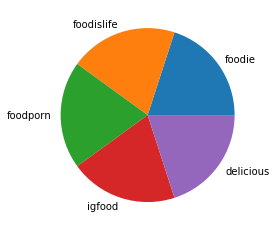

In [461]:
count = 0
for w in sorted(words, key=words.get, reverse=True):
        count += 1
        print(w,words[w])
        if(count >= 15) : 
            break
print('\n\n')
count = 0
x = []
y = []
for w in sorted(hashtags, key=hashtags.get, reverse=True):
        count += 1
        print(w,hashtags[w])
        x.append(w)
        y.append(hashtags[w])
        if(count >= 5) : 
            break
            
plt.pie(y,labels=x)
plt.show()

In [255]:
def follower_like_ratio(driver):
    
    try : 
        followers_ele = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        followers = int(followers_ele.get_attribute('title').replace(',' , ''))  
    except Exception as e:     
        print('Cant access followers')
    
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    lst = []
    for i in range(10) :
        try : 
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_8A5w5')))
            #temp = driver.find_element_by_class_name('_8A5w5')
            if temp.text == '' :
                temp = driver.find_elements_by_class_name('_8A5w5')[-1]
       
        except Exception as e:     
            try : 
                driver.find_element_by_class_name('vcOH2').click()
                temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))  
                #driver.find_element_by_class_name('QhbhU').click() 
            except Exception as e:
                print("Loading error")
                return
      
        likes = int(temp.text.split()[0].replace(',',''))
        lst.append(likes)
       # print(likes)
        
        try : 
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
    
        except Exception as e:
            try : 
                driver.find_element_by_class_name('QhbhU').click() 
                nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
                nxt.click()
            except Exception as e:
                print("No more posts")
                break     
            
    driver.find_element_by_class_name('ckWGn').click()
    
    avg_likes = sum(lst)/len(lst)
    print('avg likes :',avg_likes, '     followers :',followers)
    ratio = avg_likes/followers
    return ratio

In [211]:
follower_like_ratio(driver)

611
2613
7244
2981
7635
4028
2419
3288
3678
4691
avg likes : 3918.8      followers : 287688


0.01362170128750591

In [206]:
driver.find_element_by_class_name('vcOH2').click()#vcOH2
driver.find_element_by_class_name('vJRqr')
driver.find_element_by_class_name('QhbhU').click() 

In [225]:
d

{'yourfoodlab': 688051,
 'foodrush.recipe': 563226,
 'rajshrifood': 175817,
 'the_foodie_bae': 99530,
 'foodofgoa': 42124}

In [260]:
map_user_to_ratio = {}

for i in dict_top_5.keys() :
    print(i)
    search_and_open(driver, i)
    r = follower_like_ratio(driver)
    print(r)
    print()
    
    map_user_to_ratio[i] = r
    
    #time.sleep(2)
    #break
    

yourfoodlab
avg likes : 11525.1      followers : 688912
0.016729422625821586

foodrush.recipe
avg likes : 36592.5      followers : 564116
0.06486697771380355

rajshrifood
avg likes : 1242.8      followers : 176176
0.007054309327036599

the_foodie_bae
avg likes : 6676.8      followers : 99709
0.06696286192821109

foodofgoa
avg likes : 1735.6      followers : 42135
0.04119140856769906



In [258]:
map_user_to_ratio

{'yourfoodlab': 0.016729422625821586,
 'foodrush.recipe': 0.06486697771380355,
 'rajshrifood': 0.007054309327036599,
 'the_foodie_bae': 0.06696286192821109,
 'foodofgoa': 0.04119140856769906}

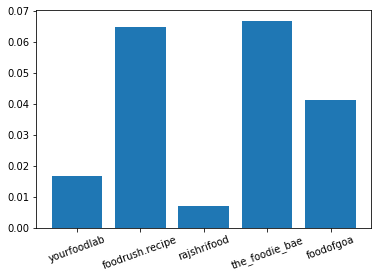

In [462]:
D = map_user_to_ratio
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation = 20)
plt.show()